<a href="https://colab.research.google.com/github/Sugandaram/Guvi_Tasks/blob/main/Assignment_15_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

**Importing the dataset**

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
sna = df.copy()

In [ ]:
sna

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
encoder = LabelEncoder()
sna['Gender'] = encoder.fit_transform(sna['Gender'])

In [ ]:
DTF = DecisionTreeClassifier()
DTF.fit(sna[['Gender','Age',"EstimatedSalary"]],sna['Purchased'])

DecisionTreeClassifier()

In [ ]:
DTF.feature_importances_

array([0.02703333, 0.50654443, 0.46642224])

In [ ]:
sna.drop(['User ID','Gender'],axis = 1 ,inplace =True)

**Splitting the dataset into the Training set and Test set**

In [ ]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)

**Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
tx_train = scaler.fit_transform(x_train)
tx_test = scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [ ]:
DTF = DecisionTreeClassifier()
DTF.fit(tx_train,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [ ]:
pred = DTF.predict(tx_test)

**Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_true = y_test,y_pred = pred)


array([[75, 13],
       [ 4, 40]])

In [ ]:
accuracy_score(y_true = y_test,y_pred = pred)


0.8712121212121212

**Visualising the Training set results**

[Text(0.5167682926829268, 0.9642857142857143, 'X[0] <= 0.631\ngini = 0.466\nsamples = 268\nvalue = [169, 99]'),
 Text(0.29878048780487804, 0.8928571428571429, 'X[1] <= 0.559\ngini = 0.305\nsamples = 197\nvalue = [160, 37]'),
 Text(0.13414634146341464, 0.8214285714285714, 'X[0] <= 0.44\ngini = 0.083\nsamples = 161\nvalue = [154, 7]'),
 Text(0.10975609756097561, 0.75, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(0.15853658536585366, 0.75, 'X[1] <= 0.389\ngini = 0.233\nsamples = 52\nvalue = [45, 7]'),
 Text(0.13414634146341464, 0.6785714285714286, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.18292682926829268, 0.6785714285714286, 'X[1] <= 0.507\ngini = 0.384\nsamples = 27\nvalue = [20, 7]'),
 Text(0.15853658536585366, 0.6071428571428571, 'X[0] <= 0.464\ngini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(0.04878048780487805, 0.5357142857142857, 'X[1] <= 0.422\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.024390243902439025, 0.4642857142857143, 'gini = 0.0\nsamples

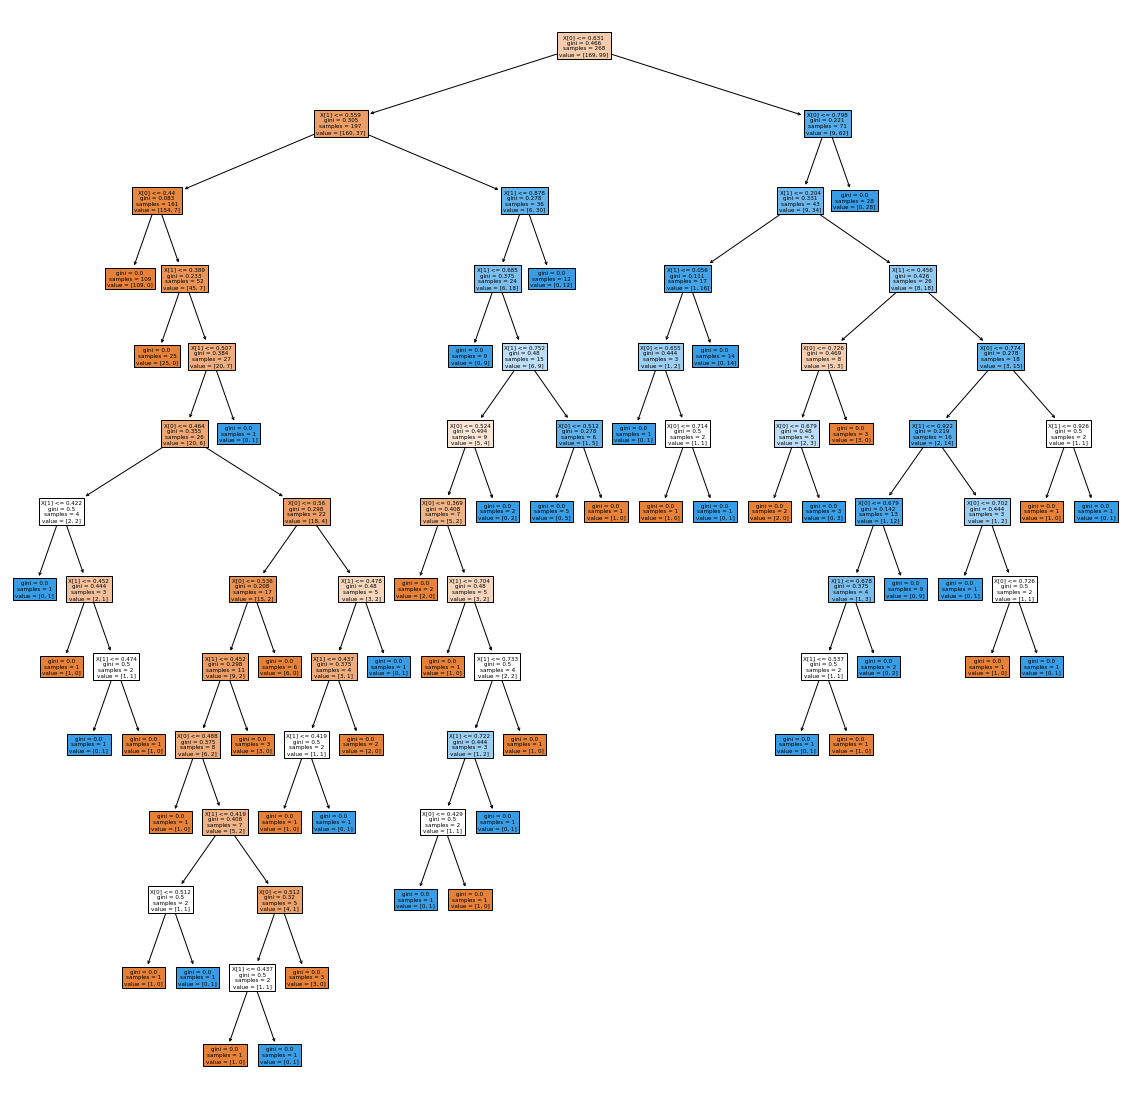

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(DTF,filled =True)

**Visualising the Test set results**

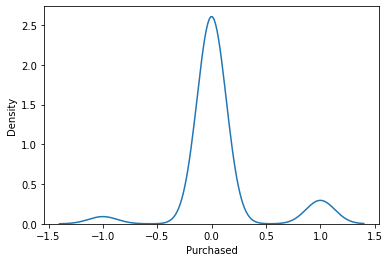

In [ ]:
sns.kdeplot(pred-y_test)
